In [1]:
using Plots

In [2]:
Nkx = 100000 #kのx方向をNkx分割
Nky = 100000 #kのy方向をNky分割
M = 100000 #エネルギーをM分割．つまりM個の階級のヒストグラムを作る．

100000

In [3]:
#二次元の分散関係は三次元空間中の曲面として表される．ブリルアンゾーン内の各kの値で曲面の高さを2次元配列にする．

#分散関係
function Ek(kx,ky)
    return -4*cos(kx)*(cos(kx)+cos(sqrt(3)*ky))
end

#波数をブリルアンゾーン内で分割
kxrange = range(-π,π,Nkx)
kyrange = range(-π,π,Nky)

#分散関係を表す二次元配列に値を入れていく．
E = zeros(Float64,Nkx,Nky)

for i in 1:Nkx
    for j in 1:Nky 
        E[i,j] = Ek(kxrange[i],kyrange[j])
    end
end

In [4]:
function count_bins(xmin,xmax,M,A)
    count = zeros(Int64,M)
    delta = (xmax-xmin)/M

    for i in 1:size(A,1)
        for j in 1:size(A,2)
            e = convert(Int64,ceil((A[i,j]-xmin)/delta))
            count[e] += 1
        end
    end

    return count
end

count_bins (generic function with 1 method)

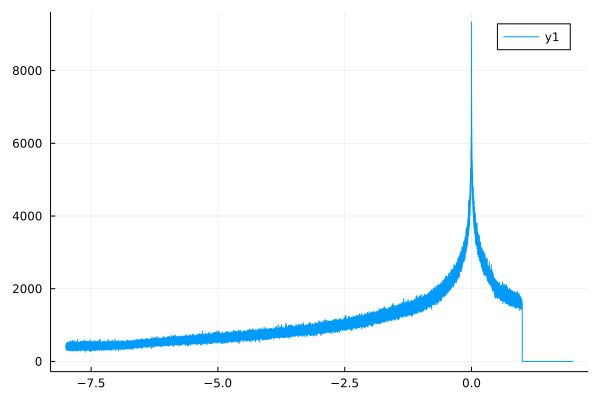

In [5]:
d = range(-8,2,M)

plot(d,count_bins(-8,2,M,E))